<font size="5"><center>Ingeniería de la Calidad<center><font>
<font size="4"><center>Examen Parcial<center>
    Iván Vega Gutiérrez


**Instrucciones generales :** Lea cuidadosamente los siguientes ejercicios y respondasegún se le requiera. Cada uno de los tres ejercicios tiene una ponderación de 33.3% de la calificación final del examen.

1. Los tipos de cambio al contado de todas las monedas están disponibles en todo momento. Los datos mostrados en la tabla ”moneda” corresponden a las tasas cambiarias para una moneda que se recopiló en intervalos de 1 minuto durante un periodo total de 100 minutos. Se muestran cinco resultados consecutivos como una muestra.
- Realizar el gráfico de control X̄-R y determinar si el proceso está bajo control estadı́stico (submuestras de tamaño 5).
- Realizar los gráficos de control para observaciones individuales (X y R-móvil) y determinar si el proceso está bajo control estadı́stico. Comparar éstos resultados con aquellos obtenidos en el punto anterior. Suponer que las observaciones de cada subgrupo fueron tomadas de forma consecutiva (n = 100).
- Supóngase que se desea detectar oportunamente un cambio en la media de 1σ. Realizar una carta EWMA e interpretar. Utilizar el valor de L = 3 y un valor adecuado de λ.

2. Los datos mostrados en la tabla llamada ”zinc” corresponden a las mediciones de concentración de zinc (medida como porcentaje de sulfato de zinc sobre el sulfato de sodio) en un procedimiento de teñido de una tela sintética. Los valores promedio y los rangos de las 20 muestras de tamaño 5 se muestran en la tabla anteriomente mencionada. Se cuentan con lı́mites de especificación establecidos por los clientes de 7.00 ± 0.25 en los porcentajes de concentración de zinc.

- Realizar un gráfico de control X̄-R y determinar si el proceso está bajo control estadı́stico.
- Supóngase que se desea detectar oportunamente un cambio en la media de 1.5σ. Ası́, realizar una carta EWMA e interpretar. Utilizar el valor de L = 3 y un valor adecuado de λ.
- ¿Cuál es la capacidad del proceso para producir de acuerdo a los lı́mites de especificación, Cpk ? Interpretar.

3. Los datos en la tabla llamada ”quimico” representan las lecturas de temperatura en grados centigrados de un proceso quı́mico. Dichas observaciones fueron tomadas cada dos minutos. El valor objetivo del proceso es µ0 = 950°C.

- Determinar el valor de Cpk e interpretar. Suponer que los lı́mites de especificación son 950 ± 30°C
- Realizar los gráficos para observaciones individuales (X y R-móvil), determinar si el proceso está bajo control estadı́stico.
- Supóngase que se desea detectar oportunamente un cambio en la media de 1σ,realizar una carta EWMA e interpretar. Probar tres diferentes valores de λ y utilizar el valor de L = 3

Para poder resolver los ejercicios planteados, en las siguientes líneas de código se muestran las funciones requeridas para graficar las cartas de control y obtener los índices de capacidad de proceso.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def get_constantes(carta, n):
    if carta == 'X-R':
        # Calculamos d2 y d3
        M = np.random.normal(size=(100000,n))
        R = []
        for i in range(len(M)):
            R.append(np.max(M[i]) - np.min(M[i]))       
        d2 = np.mean(R)
        d3 = np.std(R)
        # Calculamos las constantes
        A2 = 3/(d2*(n)**(0.5))
        D3 = 1 - 3*(d3/d2)
        if D3 < 0:
            D3 = 0
        D4 = 1 + 3*(d3/d2)
        #print('A2={}, D3={}, D4={}'.format(A2,D3,D4))
        return (A2, D3, D4, d2)
    elif carta == 'X-S':
        # Calculamos c4
        c4 = (((2/(n - 1))**0.5) * (1/math.gamma((n-1)/2))*math.gamma(n/2))
        # Calculamos las constantes
        A3 = 3/(c4*(n)**0.5)
        B3 = 1 - (3/c4)*(1-c4**2)**0.5
        if B3 < 0:
            B3 = 0
        B4 = 1 + (3/c4)*(1-c4**2)**0.5
        #print('A3={}, B3={}, B4={}'.format(A3, B3, B4))
        return(A3, B3, B4)

def get_lc(data, carta):
    long, n = data.shape
    if carta == 'X-R':
        media = []
        rango = []
        for i in range(long):
            muestra = data.iloc[i,:]
            media.append(np.mean(muestra))
            rango.append(np.max(muestra) - np.min(muestra)) 
        x_bar = sum(media)/long
        r_bar = sum(rango)/long
        A2 = get_constantes('X-R', n)[0]
        LSC = x_bar + A2*r_bar
        LC = x_bar
        LIC = x_bar - A2*r_bar
        #sigma = (A2*r_bar)/3
        d2 = get_constantes('X-R', n)[3]
        sigma = r_bar /d2
        return LSC, LC, LIC , media, sigma, x_bar
    
    elif carta == 'R':
        rango = []
        for i in range(long):
            muestra = data.iloc[i,:]
            rango.append(np.max(muestra) - np.min(muestra)) 
        r_bar = sum(rango)/long 
        D3 = get_constantes('X-R', n)[1]
        D4 = get_constantes('X-R', n)[2]
        LSC = D4*r_bar
        LC = r_bar
        LIC = D3*r_bar
        return LSC, LC, LIC, rango
    
    elif carta == 'X-S':
        media = []
        S = []
        for i in range(long):
            muestra = data.iloc[i,:]
            media.append(np.mean(muestra))
            S.append(np.std(muestra))
        x_bar = sum(media)/long
        s_bar = sum(S)/long
        A3 = get_constantes('X-S', n)[0]
        LSC = x_bar + A3*s_bar
        LC = x_bar
        LIC = x_bar - A3*s_bar
        sigma = (A3*s_bar)/3
        return LSC, LC, LIC, media, sigma
    
    elif carta == 'S':
        S = []
        for i in range(long):
            muestra = data.iloc[i,:]
            S.append(np.std(muestra))
        s_bar = sum(S)/long
        B3 = get_constantes('X-S', n)[1]
        B4 = get_constantes('X-S', n)[2]
        LSC = B4*s_bar
        LC = s_bar
        LIC = B3*s_bar
        return LSC, LC, LIC, S
    
    elif carta == 'I':
        rm = []
        for i in range(long-1):
            rm_i = abs(data.iloc[i+1] - data.iloc[i])
            rm.append(rm_i)
        rm_bar = np.mean(rm)
        x_bar = np.mean(data)
        LSC = x_bar + 2.659*rm_bar
        LC = x_bar
        LIC = x_bar - 2.659*rm_bar
        sigma = (2.659*rm_bar)/3
        return LSC, LC, LIC ,data, sigma, rm
    
    elif carta == 'RM':
        rm = []
        for i in range(long-1):
            rm_i = abs(data.iloc[i+1] - data.iloc[i])
            rm.append(rm_i)
        rm_bar = np.mean(rm)
        LSC = 3.268*rm_bar
        LC = rm_bar
        LIC = 0
        return LSC, LC, LIC ,rm

def grafica_carta(limites, carta):
    LSC = limites[0]
    LC = limites[1]
    LIC = limites[2]
    datos = limites[3]
    obs = np.arange(1,len(datos)+1)
    num_obs = len(obs)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(obs, datos, marker='o')
    ax.plot([1,num_obs],[LC,LC], color = 'green')
    ax.plot([1,num_obs],[LSC,LSC], color = 'red', linestyle = 'dashed')
    ax.plot([1,num_obs],[LIC,LIC], color = 'red', linestyle = 'dashed')
    plt.text(num_obs,LSC, 'LSC = {}'.format(round(float(LSC),2)))
    plt.text(num_obs,LC, 'LC = {}'.format(round(float(LC),2)))
    plt.text(num_obs,LIC, 'LIC = {}'.format(round(float(LIC),2)))
    plt.title('Carta de control : ' + carta)
    plt.xlabel('Muestra')
    
def grafica_carta_esp(limites, carta, lim_esp):
    LSC = limites[0]
    LC = limites[1]
    LIC = limites[2]
    datos = limites[3]
    obs = np.arange(1,len(datos)+1)
    num_obs = len(obs)
    LES = lim_esp[0]
    LEI = lim_esp[1]
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(obs, datos, marker='o')
    ax.plot([1,num_obs],[LC,LC], color = 'green')
    ax.plot([1,num_obs],[LSC,LSC], color = 'red', linestyle = 'dashed')
    ax.plot([1,num_obs],[LIC,LIC], color = 'red', linestyle = 'dashed')
    plt.text(num_obs,LSC, 'LSC = {}'.format(round(float(LSC),2)))
    plt.text(num_obs,LC, 'LC = {}'.format(round(float(LC),2)))
    plt.text(num_obs,LIC, 'LIC = {}'.format(round(float(LIC),2)))
    plt.text(num_obs,LES, 'LES = {}'.format(LES))
    plt.text(num_obs,LEI, 'LEI = {}'.format(LEI))
    plt.title('Carta de control : ' + carta)
    plt.xlabel('Muestra')
    ax.plot([1,num_obs],[LES,LES], color = 'black', linestyle = 'dashed')
    ax.plot([1,num_obs],[LEI,LEI], color = 'black', linestyle = 'dashed')

In [39]:
def get_cp(LES, LEI, sigma):
    cp = (LES - LEI)/(6*sigma)
    return cp

def get_cps(LES, sigma, mu):
    cps = (LES - mu)/(3*sigma)
    return cps

def get_cpi(LEI, sigma, mu):
    cpi = (mu - LEI)/(3*sigma)
    return cpi

def get_cpk(cps, cpi):
    cpk = min(cps, cpi)
    return cpk

def get_obs_cp(cp):
    if cp > 2:
        return 'Clase mundial : Calidad Seis Sigma'
    elif 1.3 < cp <= 2:
        return 'Tipo de proceso 1 : Más que adecuado'
    elif 1 < cp <= 1.33:
        return 'Tipo de proceso 2 : Adecuado, pero requiere de un control estricto'
    elif 0.67 < cp <= 1:
        return 'Tipo de proceso 3 : No adecuado, requiere modificaciones '
    else:
        return 'Tipo de proceso 4 : No adecuado, requiere modificaciones serias'

def get_obs_cpk(cpk):
    if 1 <= cpk:
        return 'El proceso está fabricando artículos que cumplen con las especificaciones.'
    elif 0 < cpk < 1:
        return 'El proceso está produciendo artículos fuera de las especificaciones.'
    else:
        return 'La media del proceso está fuera de las especificaciones.'

def get_indices_capacidad(lim_esp, mu, sigma):
    LES = lim_esp[0]
    LEI = lim_esp[1]
    cp = get_cp(LES, LEI, sigma)
    cps = get_cps(LES, sigma, mu)
    cpi = get_cpi(LEI, sigma, mu)
    cpk = get_cpk(cps, cpi)
    df = pd.DataFrame()
    df['Indice'] = ['Cp', 'Cps', 'Cpi', 'Cpk']
    df['Valor'] = [cp, cps, cpi, cpk]
    print(df)
    print()
    print('--------Observaciones--------')
    print(get_obs_cp(cp))
    print(get_obs_cpk(cpk))
    
def get_hist(datos, lim_esp):
    LES = lim_esp[0]
    LEI = lim_esp[1]
    sns.histplot(data = datos, bins = 12, kde = True)
    plt.axvline(x = LES, color='r', linestyle='--')
    plt.axvline(x = LEI, color='r', linestyle='--')
    plt.text(LES,1, 'LES')
    plt.text(LEI,1, 'LEI')
    plt.show()

In [40]:
def get_c_mas(data, mu_0, k):
    C = [0]
    for i in range(len(data)):
        ci_mas = max(0, data[i] - (mu_0 + k) + C[i])
        C.append(round(ci_mas, 2))
    return C[1:]

def get_c_menos(data, mu_0, k):
    C = [0]
    for i in range(len(data)):
        ci_menos = max(0, (mu_0 - k) - data[i] + C[i])
        C.append(round(ci_menos, 2))
    return C[1:]

def plot_cusum(cmas, cmenos, H):
    C_menos = [c*-1 for c in cmenos]
    fig, ax = plt.subplots(figsize=(12,6))
    obs = np.arange(1, len(cmas)+1)
    ax.plot(obs, cmas, marker='o', color = 'blue')
    ax.plot(obs, C_menos, marker = 'o', color = 'red')
    ax.plot([1,len(obs)],[H,H], color = 'black', linestyle = 'dashed')
    ax.plot([1,len(obs)],[-H,-H], color = 'black', linestyle = 'dashed')
    ax.plot([1,len(obs)],[0,0], color = 'black', linestyle = 'solid')
    
def get_zi(data, lambdaa, z_0):
    Z = [z_0]
    for i in range(len(data)):
        zi = lambdaa*data[i] + (1-lambdaa)*Z[i]
        Z.append(round(zi,5))
    return Z[1:]
    
def get_UCL(mu_0, L, sigma, lambdaa, size_data):
    UCL = []
    for i in range(1,size_data + 1):
        ucl = mu_0 + L*sigma*( (lambdaa/(2-lambdaa))* (1- (1-lambdaa)**(2*i) ) )**0.5
        UCL.append(round(ucl, 5))
    return UCL

def get_LCL(mu_0, L, sigma, lambdaa, size_data):
    LCL = []
    for i in range(1,size_data + 1):
        lcl = mu_0 - L*sigma*( (lambdaa/(2-lambdaa))* (1- (1-lambdaa)**(2*i) ) )**0.5
        LCL.append(round(lcl, 5))
    return LCL

def plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L):
    obs = np.arange(1,len(Z)+1)
    num_obs = len(obs)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(obs, Z, marker='o')
    ax.plot([1, num_obs],[mu_0,mu_0], color = 'black', linestyle = 'solid')
    plt.title('Carta de control EWMA con $\lambda$ = {} y $L$ = {}'.format(lambdaa, L))
    plt.xlabel('Muestra')
    plt.ylabel('EWMA')
    plt.text(num_obs,round(UCL[-1],2), 'UCL = {}'.format(round(UCL[-1],2)))
    plt.text(num_obs,round(LCL[-1],2), 'LCL = {}'.format(round(LCL[-1],2)))
    plt.text(num_obs+1,mu_0, mu_0)
    X = np.arange(0.5, num_obs+1)
    for i in range(num_obs):
        ax.plot([X[i], X[i+1]], [UCL[i], UCL[i]], color= 'red')
        ax.plot([X[i], X[i+1]], [LCL[i], LCL[i]], color= 'red')
        try:
            plt.vlines(X[i+1], ymin = UCL[i], ymax = UCL[i+1], color = 'red')
            plt.vlines(X[i+1], ymin = LCL[i], ymax = LCL[i+1], color = 'red')
        except IndexError:
            return None

## Solución de 1

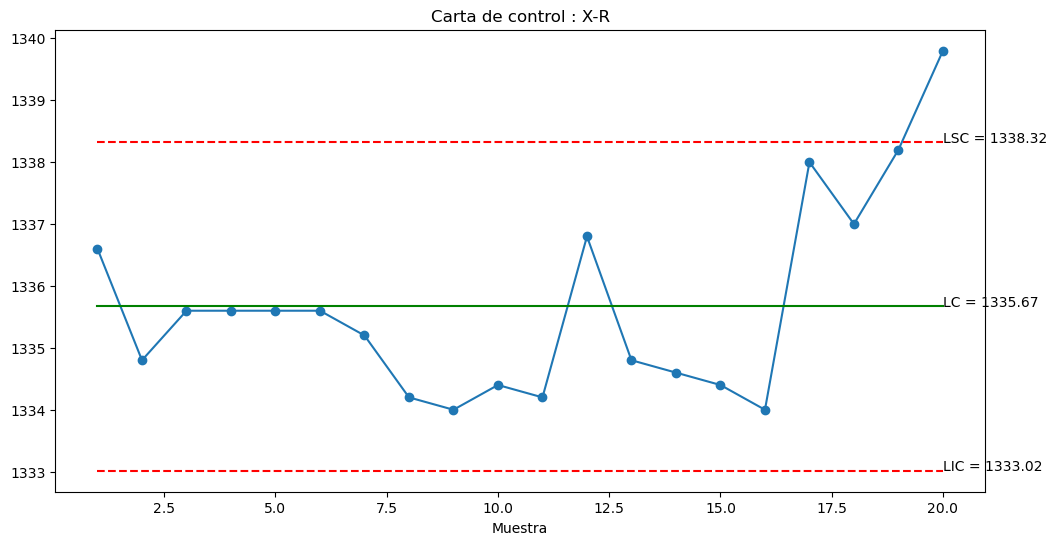

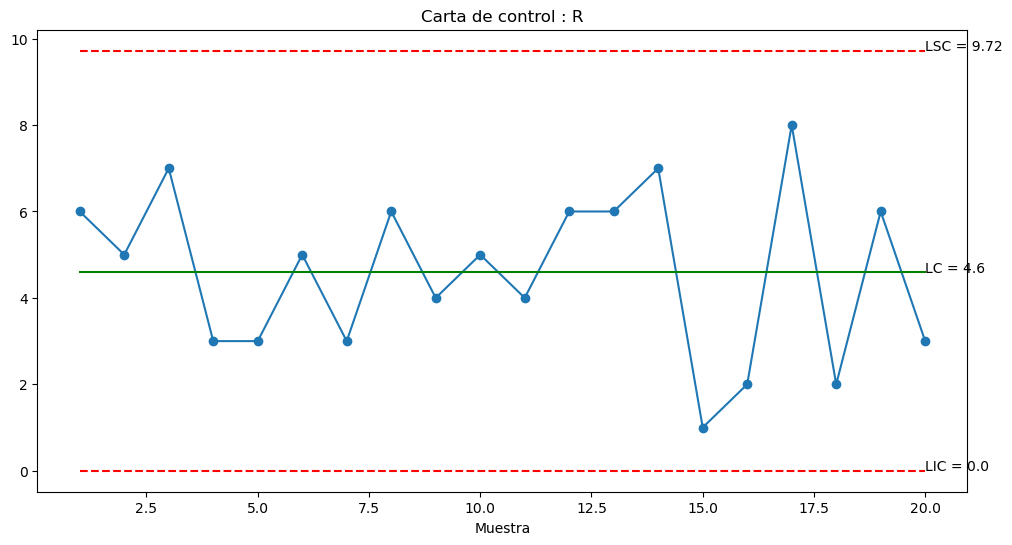

In [53]:
data_1 = pd.read_excel('Data for midterm.xlsx', sheet_name = 'moneda')
limites1 = get_lc(data_1.iloc[:,1:], 'X-R')
limites1_r = get_lc(data_1.iloc[:,1:], 'R')
grafica_carta(limites1, 'X-R')
grafica_carta(limites1_r,'R')

De la carta de control $R$ se observa que no hay señales de que el proceso se encuentre fuera de control, sin embargo a partir de la muestra quince se observan algunos cambios bruscos en el proceso, lo que se ve reflejado en la carta $\bar{X}$ ya que en la última muestra el proceso se encuentra fuera de los límites de control y se observa un comportamiento ascendente de los datos.

/home/vega/anaconda3/envs/control/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


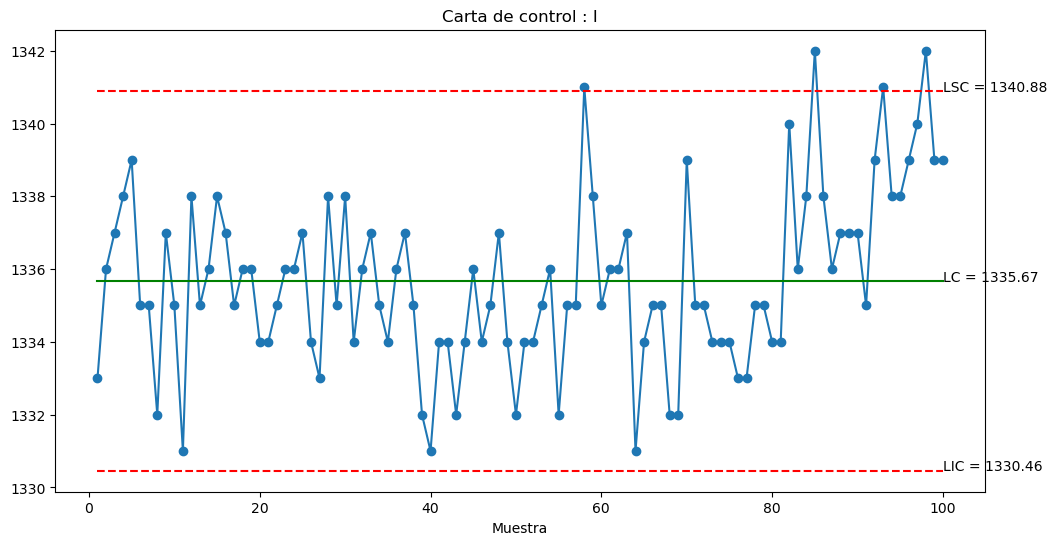

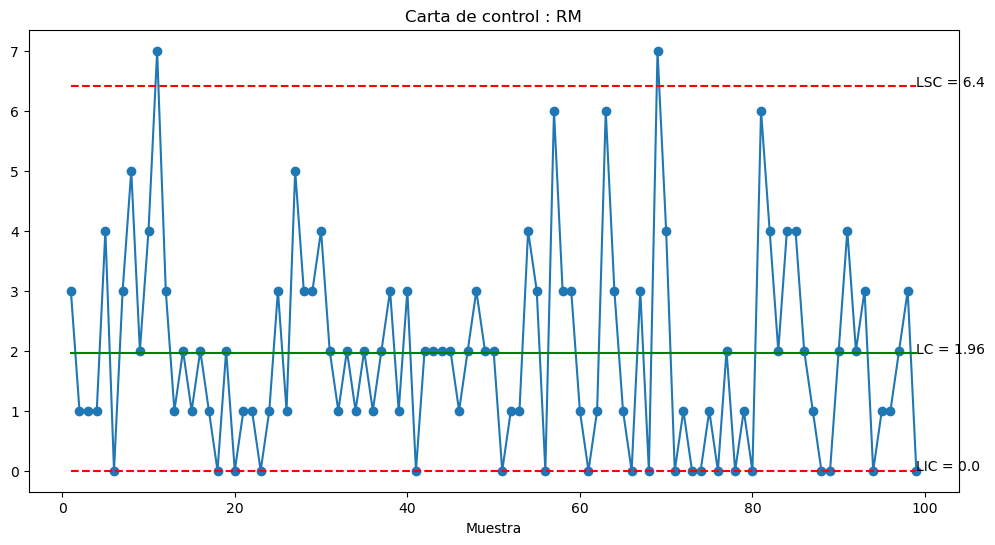

In [54]:
data_1_flatten = pd.DataFrame()
data_1_flatten['valor'] = data_1.iloc[:,1:].stack().values
limites1_i = get_lc(data_1_flatten, 'I')
limites1_rm = get_lc(data_1_flatten, 'RM')
grafica_carta(limites1_i, 'I')
grafica_carta(limites1_rm, 'RM')

Suponiendo que las observaciones de cada muestra son independientes se obtienen resultados interesantes. Lo primero que se puede observar es que la variación de las observaciones se encuentra fuera de control, por lo tanto al hacer esta suposición desde la carta de rangos moviles se tiene sospecha de que el proceso está fuera de control. Por otro lado, de la carta $I$ se sigue notando un comportamiento ascendente en las últimas observaciones, lo que provoca que el proceso se encuentre fuera de control y sea más notorio, con más observaciones fuera de los límites de control.

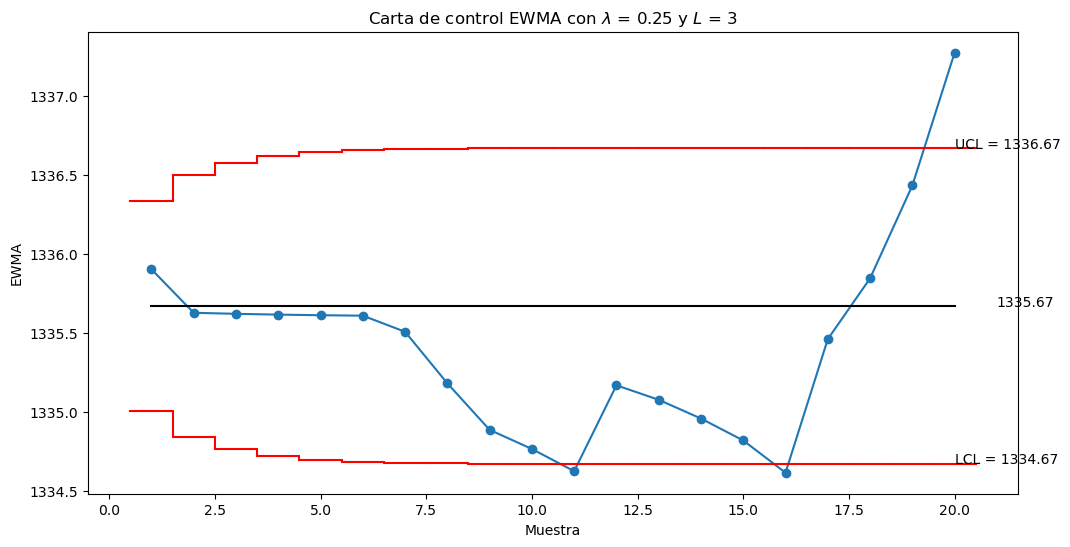

In [57]:
data1_ewma = get_lc(data_1.iloc[:,1:], 'X-R')[3]
lambdaa = 0.25
L = 3
sigma_1 = get_lc(data_1.iloc[:,1:], 'X-R')[4]
sigma1_ewma = sigma_1/(5)**0.5
size_data = len(data1_ewma)
mu_0 = get_lc(data_1.iloc[:,1:], 'X-R')[5]
z_0 = mu_0
Z = get_zi(data1_ewma, lambdaa, z_0)
UCL = get_UCL(mu_0, L, sigma1_ewma, lambdaa, size_data)
LCL = get_LCL(mu_0, L, sigma1_ewma, lambdaa, size_data)
plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L)

Para la carta de control EWMA se eligió un valor de $\lambda = 0.25$, debido a que en las cartas anteriores se nota un comportamiento extraño en las últimas muestras,de esta manera no se le da tanto peso a las primeras muestras donde sabemos qu eel proceso se encuentra en control. De la gráfica se puede observar que la carta EWMA es capaz de detectar pequeños cambios, ya que las muestras 11, 16 y 20 el proceso está fuera de control.

Con todo lo anterior podemos concluir que es necesario revisar las causas que provoquen que el proceso esté fuera de control, sobretodo analizar que sucede con las últimas muestras y porque la variabilidad aumenta.

## Solción de 2

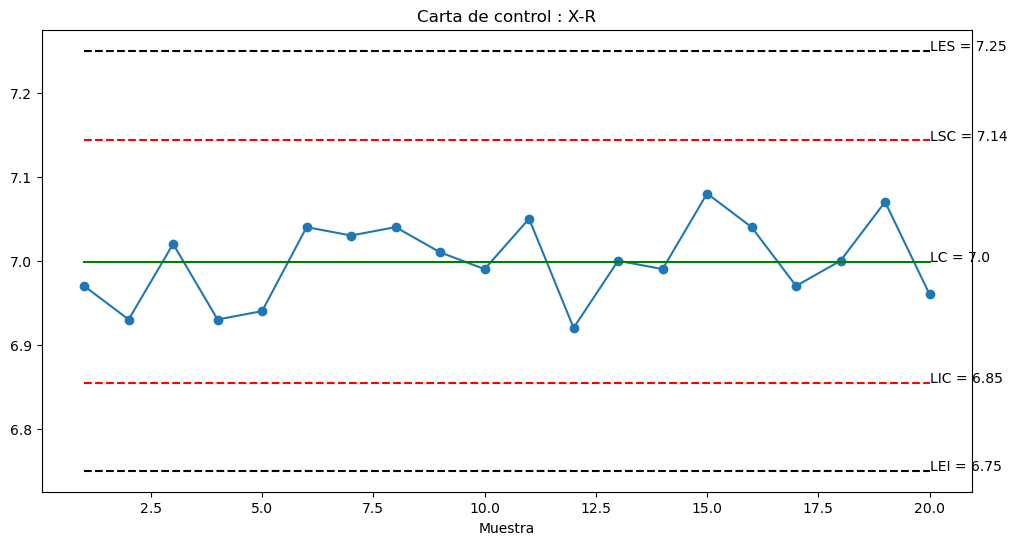

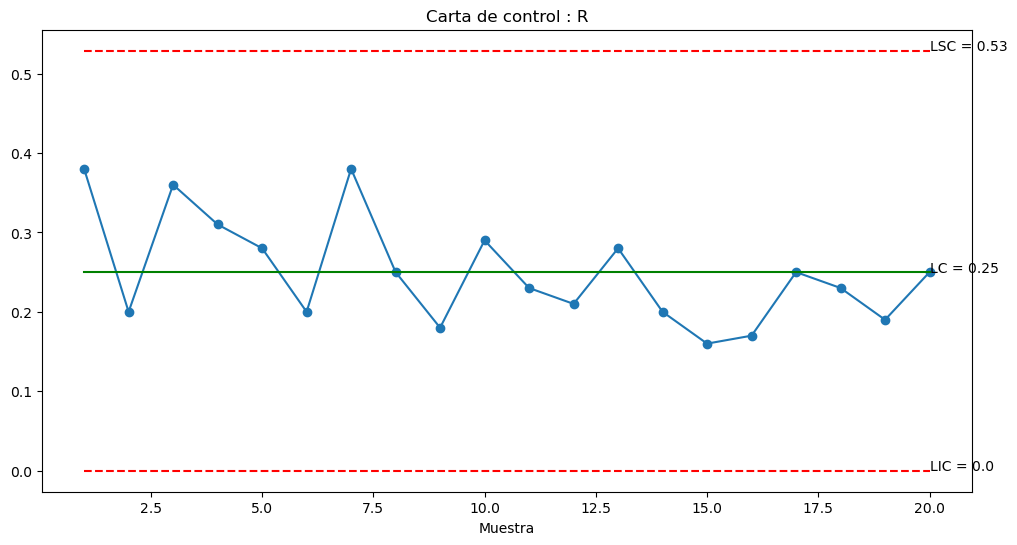

In [59]:
data_2 = pd.read_excel('Data for midterm.xlsx', sheet_name = 'zinc')
lim_esp_2 = [7.25, 6.75]
x_bar = data_2['Concentracion media'].mean()
r_bar = data_2['Rango'].mean()
# Hallamos los límites de control para las medias
A2 = get_constantes('X-R', 5)[0]
LSC_xr = x_bar + A2*r_bar
LC_xr = x_bar
LIC_xr = x_bar - A2*r_bar
limites_2 = (LSC_xr, LC_xr, LIC_xr, data_2['Concentracion media'])
# Hallamos los límites de control para el rango
D3 = get_constantes('X-R', 5)[1]
D4 = get_constantes('X-R', 5)[2]
LSC_r = D4*r_bar
LC_r = r_bar
LIC_r = D3*r_bar
limites_2_r = (LSC_r, LC_r, LIC_r, data_2['Rango'])
# Graficamos las cartas de control
grafica_carta_esp(limites_2, 'X-R', lim_esp_2)
grafica_carta(limites_2_r, 'R')

De las cartas de control no se observan indicios de que el proceso se encuentre fuera de control, al contrario, se nota que la variabilidad se estabiliza. Pareciera ser el escenario perfecto ya que de la carta de medias se observa que el proceso se encuentra dentro de los límites de control y sobretodo de los límites de especificación, por lo que se pensaría que el proceso está produciendo concentración de zinc que cumple con las especificaciones.

In [60]:
d2 = get_constantes('X-R',5)[3]
sigma_2 = r_bar /d2
mu = x_bar
get_indices_capacidad(lim_esp_2, mu, sigma_2)

  Indice     Valor
0     Cp  0.775379
1    Cps  0.778480
2    Cpi  0.772277
3    Cpk  0.772277

--------Observaciones--------
Tipo de proceso 3 : No adecuado, requiere modificaciones 
El proceso está produciendo artículos fuera de las especificaciones.


Al obtener los índices de capacidad obenemos un resultado que pareciera ir en contra de las cartas de control. Ya que tenemos un proceso que está en control pero opera de manera inadecuada. 

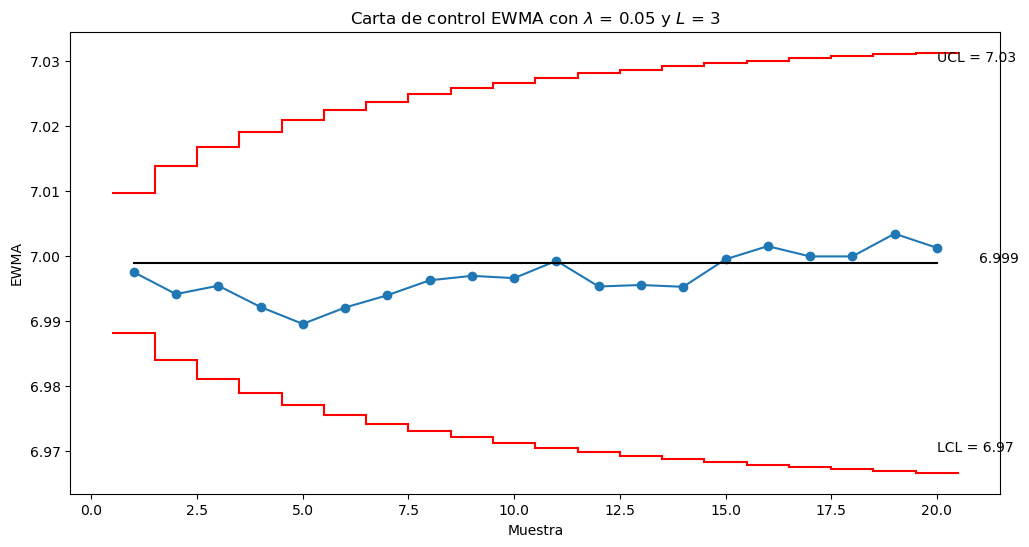

In [62]:
lambdaa = 0.05
L = 3
sigma = sigma_2/((5)**0.5)
size_data = len(data_2)
mu_0 = mu
z_0 = mu_0
Z = get_zi(data_2['Concentracion media'], lambdaa, z_0)
UCL = get_UCL(mu_0, L, 1.5*sigma, lambdaa, size_data)
LCL = get_LCL(mu_0, L, 1.5*sigma, lambdaa, size_data)
plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L)

Por último, de la carta EWMA, se obtienen resultados similaeres a los que se obtuvieron en la carta $X-R$, donde se observa que el proceso está en control y que además se nota una estabilidad en la varianza de las muestras.

Con los resultados de la carta de control EWMA, sería conveniente revisar porque ese obtiene un índice de capacidad tan bajo, el estimador que se uso para la desviación estándar fue $$\hat{\sigma} = \bar{R}/d_2$$

Aunque estos resultados son un poco contradictorios y podrían deberse a un error de cálculo, también es posible que no haya error, ya que existen casos en los que un proceso está en control pero opera de manera deficiente.

## Solución de 3

/home/vega/anaconda3/envs/control/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


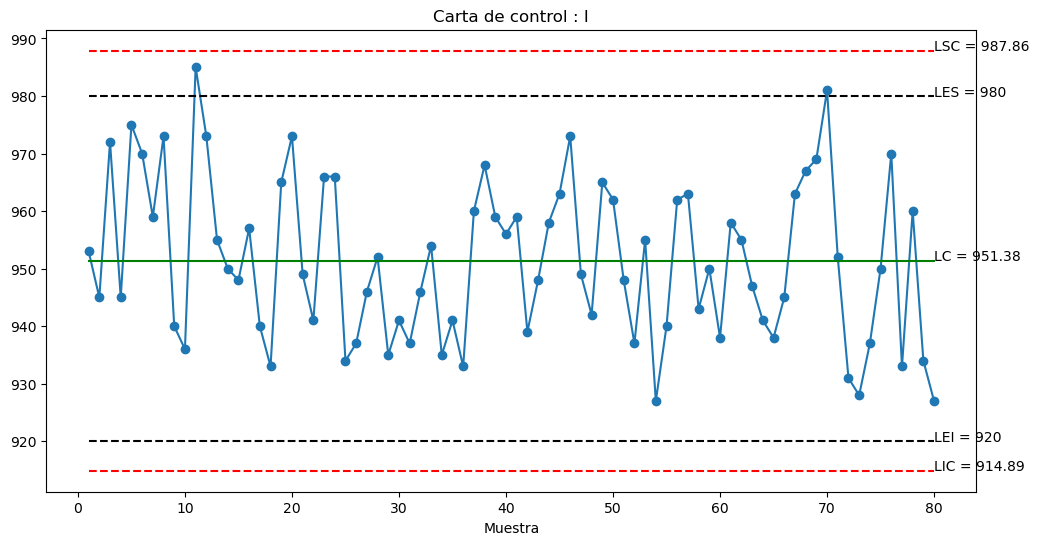

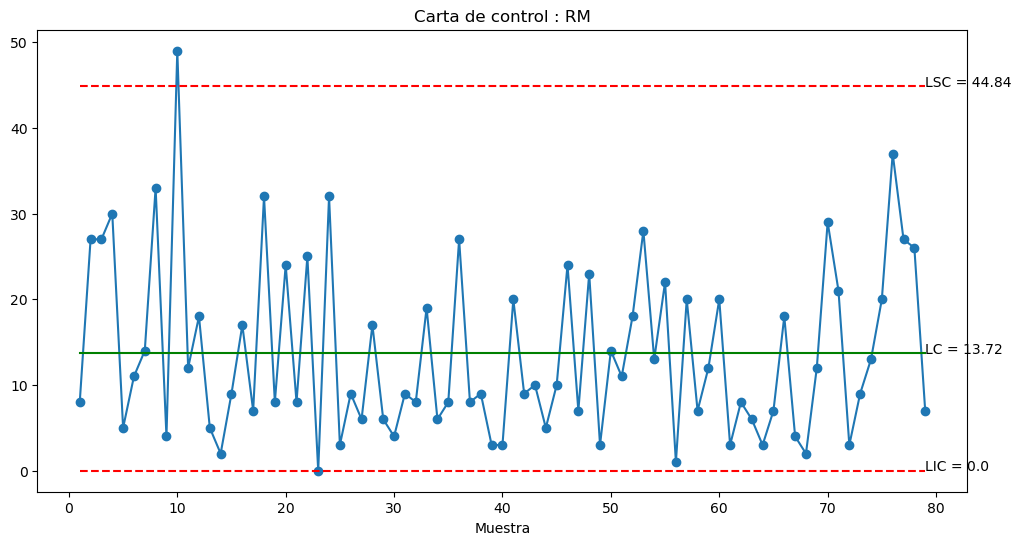

In [47]:
data_3 = pd.read_excel('Data for midterm.xlsx', sheet_name = 'quimico')
lim_esp_3 = [980, 920 ]
limites3 = get_lc(data_3, 'I')
limites3_rm = get_lc(data_3, 'RM')
grafica_carta_esp(limites3, 'I', lim_esp_3)
grafica_carta(limites3_rm, 'RM')

De las cartas de control se observa que aproximadamente de la muestra 9 a 10 la variabilidad cambia drásticamente. También, se observan dos muestras que se encuentran por encima de los límites de especificación y uno de ellos muy cercano a los límites de control, que justamente es en la muestra 10. Por lo tanto, a pesar de que el proceso está en control, no se está cumpliendo con los límites de especificación, por lo que sería conveniente revisar cuales son las causas que provocan este comportamiento.

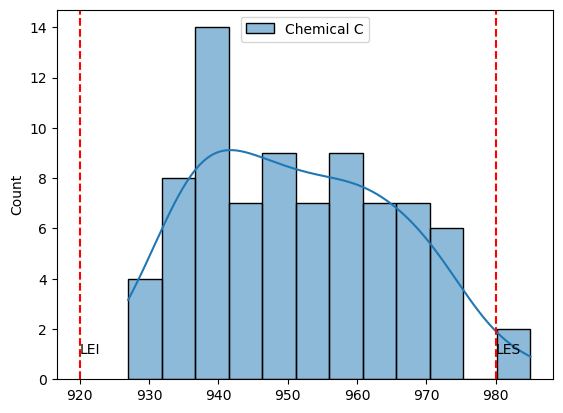

  Indice     Valor
0     Cp  0.822244
1    Cps  0.784558
2    Cpi  0.859930
3    Cpk  0.784558

--------Observaciones--------
Tipo de proceso 3 : No adecuado, requiere modificaciones 
El proceso está produciendo artículos fuera de las especificaciones.


In [48]:
mu = np.array(data_3).mean()
sigma = limites3[4]
get_hist(data_3,lim_esp_3)
get_indices_capacidad(lim_esp_3, mu, sigma)

Al obtener los índices de capacidad del proceso, se refuerzan las conclusiones de las cartas de control, y se observa que existen temperaturas que están por fuera de los límites de especificación. 

/home/vega/anaconda3/envs/control/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


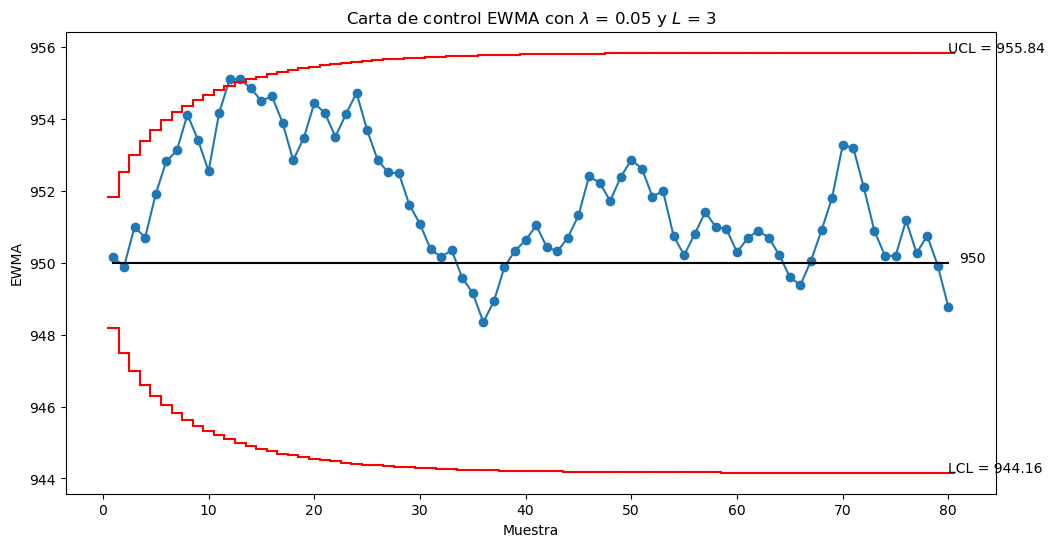

In [49]:
lambdaa = 0.05
L = 3
sigma = get_lc(data_3, 'I')[4]
size_data = len(data_3['Chemical C'])
mu_0 = 950
z_0 = mu_0
Z = get_zi(data_3['Chemical C'], lambdaa, z_0)
UCL = get_UCL(mu_0, L, sigma, lambdaa, size_data)
LCL = get_LCL(mu_0, L, sigma, lambdaa, size_data)
plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L)

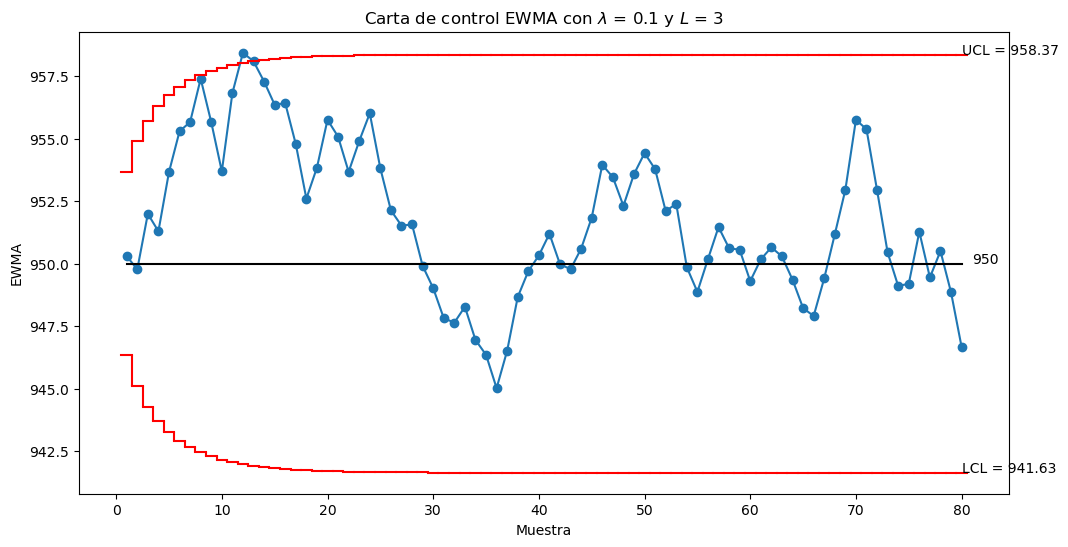

In [50]:
lambdaa = 0.1
L = 3
sigma = get_lc(data_3, 'I')[4]
size_data = len(data_3['Chemical C'])
mu_0 = 950
z_0 = mu_0
Z = get_zi(data_3['Chemical C'], lambdaa, z_0)
UCL = get_UCL(mu_0, L, sigma, lambdaa, size_data)
LCL = get_LCL(mu_0, L, sigma, lambdaa, size_data)
plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L)

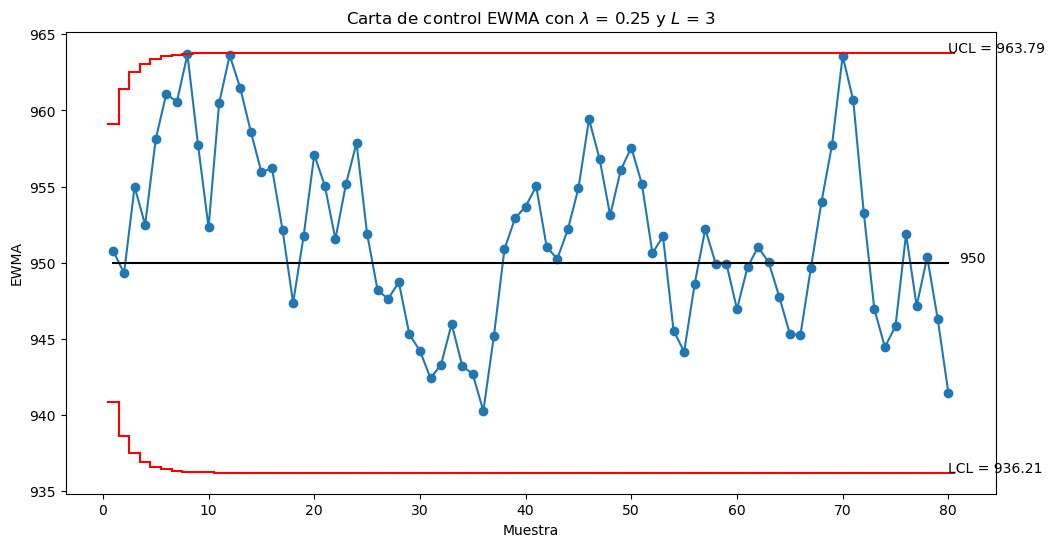

In [51]:
lambdaa = 0.25
L = 3
sigma = get_lc(data_3, 'I')[4]
size_data = len(data_3['Chemical C'])
mu_0 = 950
z_0 = mu_0
Z = get_zi(data_3['Chemical C'], lambdaa, z_0)
UCL = get_UCL(mu_0, L, sigma, lambdaa, size_data)
LCL = get_LCL(mu_0, L, sigma, lambdaa, size_data)
plot_ewma(Z, UCL, LCL, mu_0, lambdaa, L)

Por último, a partir de la carta EWMA y utilizar tres valores diferentes de $\lambda$ (bajo, medio y alto) se observan muestras que se encuentran fuera de los límites de control. Para un valor alto de $\lambda$ la carta EWMA es capaz de detectar que en la muestra 70 está muy cerca del límie de control superior. Así, la carta EWMA refuerza las conclusiones previas.

Con todo lo anterior, podemos concluir que existen temperaturas que están por fuera de los límites de especificación y es necesario identificar las causas de este comportamiento, revisar si hay agentes externos involucrados y tratar de disminuir las temperaturas.